<a href="https://colab.research.google.com/github/samarthgupta1/Yulu---Hypothesis-Testing/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bussiness Problem
###About Yulu
Yulu is Indias leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

###How you can help here?
The company wants to know:
*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands.


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math 
from scipy.stats import ttest_ind
from scipy.stats import kstest,norm
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [ ]:
pd.reset_option("display.max_rows")

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/bike_sharing.txt")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.isna().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
##First changing  dtype of datetime col to datetime 
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df['year']=df['datetime'].dt.year

In [ ]:
df['month']=df['datetime'].dt.month

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


# Insights

*   There are no missing value in the dataset
*   we need to change datatype of column datetime to datatime 

*   The casual and registered attributes can contain outlier since there mean , median and max value very far away
*   Count is our Target variable

*   On holidays there are very less cycles rented 
*   On workingdays there are more cycles rented compared to non workingday

*   Almost 70 % weather is Clear, Few clouds, partly cloudy, partly cloudy.









<Axes: xlabel='weather', ylabel='count'>

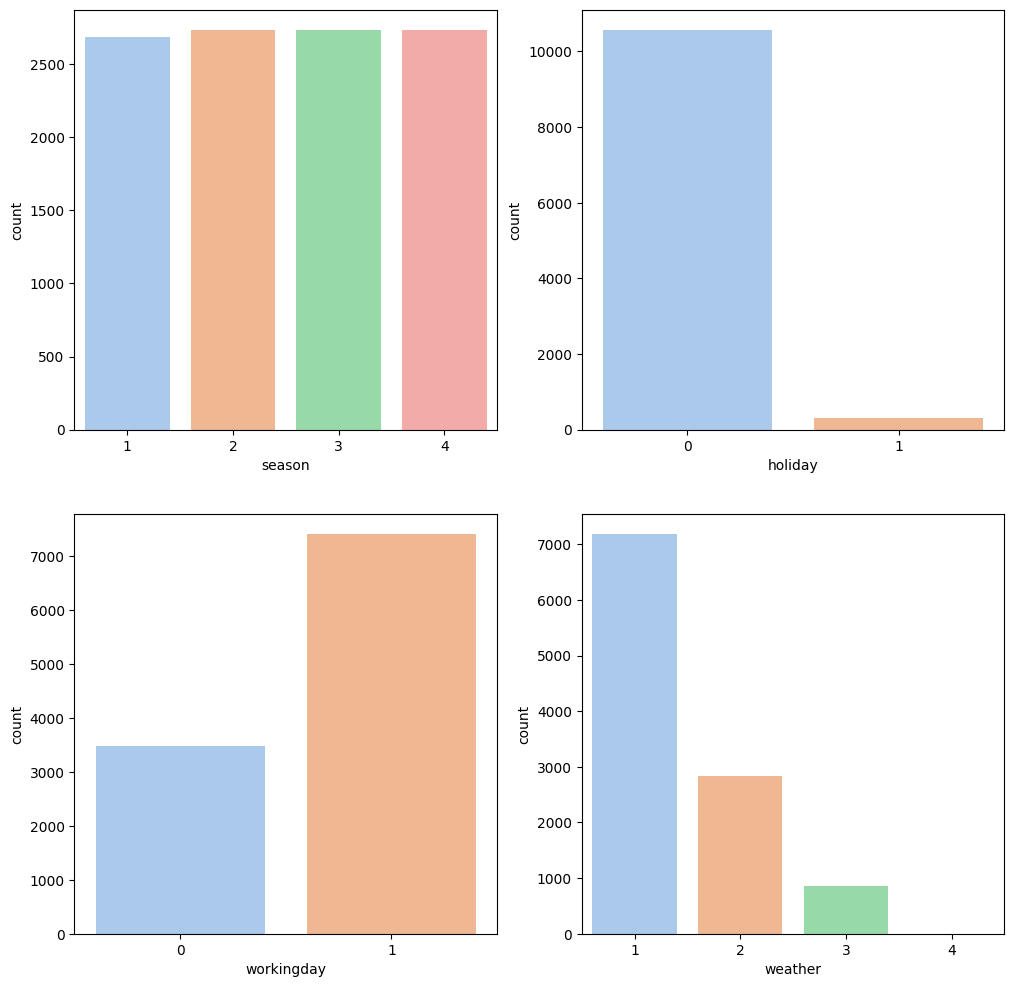

In [ ]:
fig=plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(data=df, x="season",palette="pastel")

plt.subplot(2,2,2)
sns.countplot(data=df, x="holiday",palette="pastel")

plt.subplot(2,2,3)
sns.countplot(data=df, x="workingday",palette="pastel")

plt.subplot(2,2,4)
sns.countplot(data=df, x="weather",palette="pastel")

# Insights

*   There are almost same number of cycles rented every season. 
*   On holidays there are very less cycles rented 
*   On workingdays there are more cycles rented compared to non workingday 
*   Mostly cycles rented when weather is Clear, Few clouds, partly cloudy, partly cloudy. 
*   when weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog very very less cycles rented.

<Axes: xlabel='month', ylabel='count'>

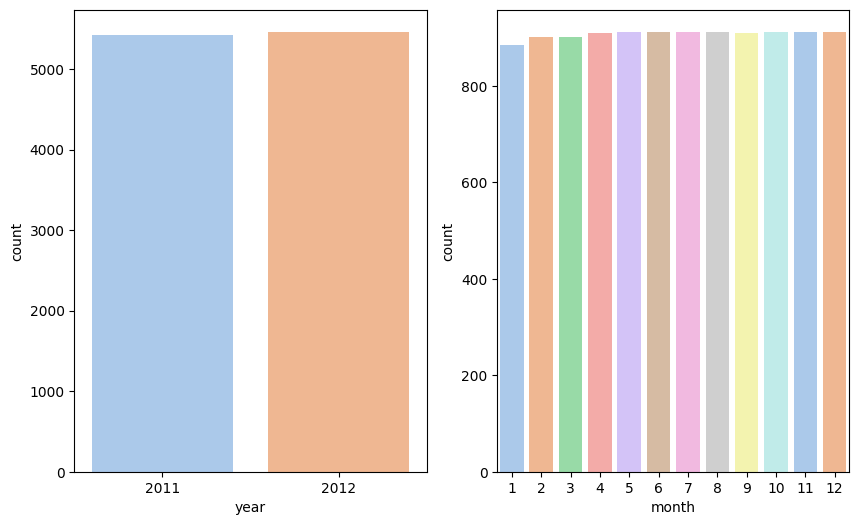

In [ ]:
fig=plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data=df, x="year",palette="pastel")

plt.subplot(1,2,2)
sns.countplot(data=df, x="month",palette="pastel")

# Insights

*   In dataset data is from years 2011 and 2012 
*   Almost every month same number of cycles rented. 

<Axes: xlabel='count', ylabel='Count'>

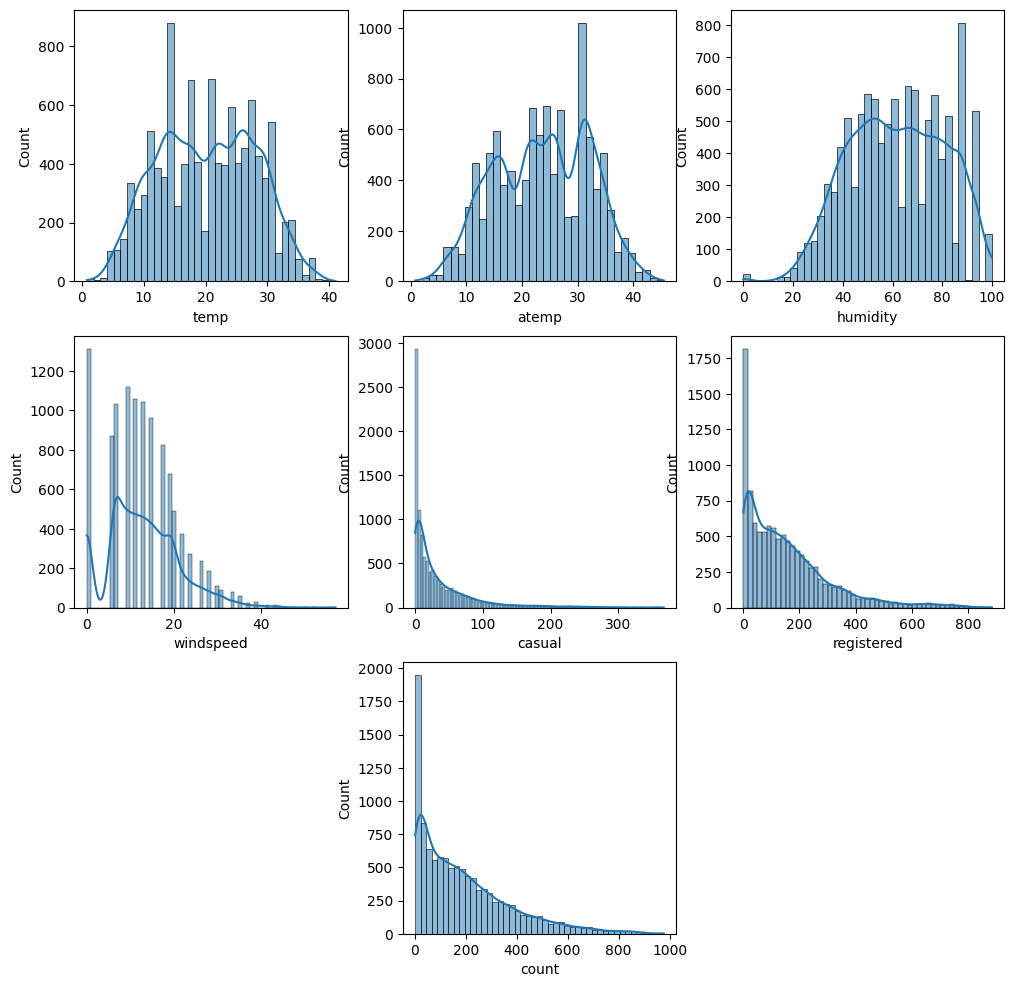

In [ ]:
fig=plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x="temp",kde=True)

plt.subplot(3,3,2)
sns.histplot(data=df, x="atemp",kde=True)

plt.subplot(3,3,3)
sns.histplot(data=df, x="humidity",kde=True)

plt.subplot(3,3,4)
sns.histplot(data=df, x="windspeed",kde=True)

plt.subplot(3,3,5)
sns.histplot(data=df, x="casual",kde=True)

plt.subplot(3,3,6)
sns.histplot(data=df, x="registered",kde=True)

plt.subplot(3,3,8)
sns.histplot(data=df, x="count",kde=True)

# Insights

*   casual, registered and count somewhat looks like Log Normal Distrinution 
*   temp, atemp and humidity  kinda look like they follows the Normal Distribution

<Axes: ylabel='count'>

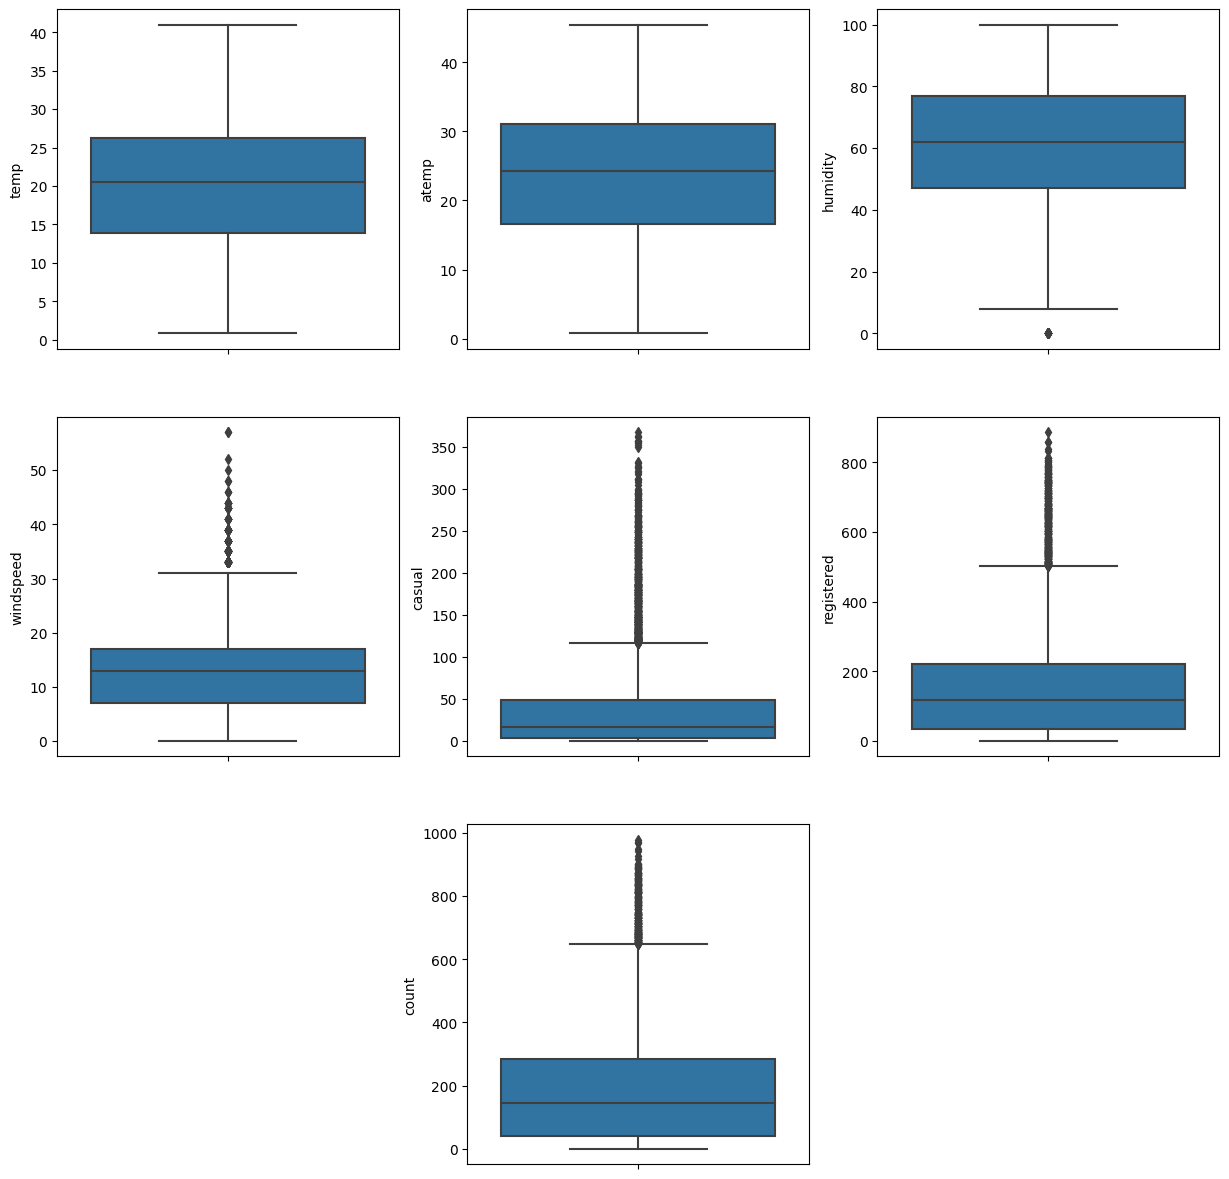

In [ ]:
fig=plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(data=df, y="temp")

plt.subplot(3,3,2)
sns.boxplot(data=df, y="atemp")

plt.subplot(3,3,3)
sns.boxplot(data=df, y="humidity")

plt.subplot(3,3,4)
sns.boxplot(data=df, y="windspeed")

plt.subplot(3,3,5)
sns.boxplot(data=df, y="casual")

plt.subplot(3,3,6)
sns.boxplot(data=df, y="registered")

plt.subplot(3,3,8)
sns.boxplot(data=df, y="count")

# Insights

*   casual, registered, count  and windspeed  have outliers.

In [ ]:
sum_month=df.groupby("month")["count"].sum().reset_index()
sum_month

,month,count
0,1,79884
1,2,99113
2,3,133501
3,4,167402
4,5,200147
5,6,220733
6,7,214617
7,8,213516
8,9,212529
9,10,207434


<Axes: xlabel='month', ylabel='count'>

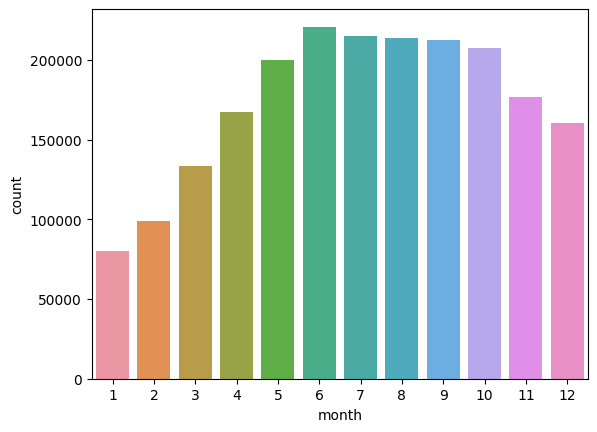

In [ ]:
sns.barplot(data=sum_month,x=sum_month["month"],y=sum_month["count"])

# Insights

*   Here we can see that at the  **starting of year  (*months:1,2,3,4***) have less cycles rented  as it **increases to top in middle of year (*months :5,6,7,8,9,10*)** and at the **end of year number of rented cycles decreases (*months :11,12*)**

* the  months January and february have lowest number of rented cycles

In [ ]:
sum_year=df.groupby("year")["count"].sum().reset_index()
sum_year

,year,count
0,2011,781979
1,2012,1303497


<Axes: xlabel='year', ylabel='count'>

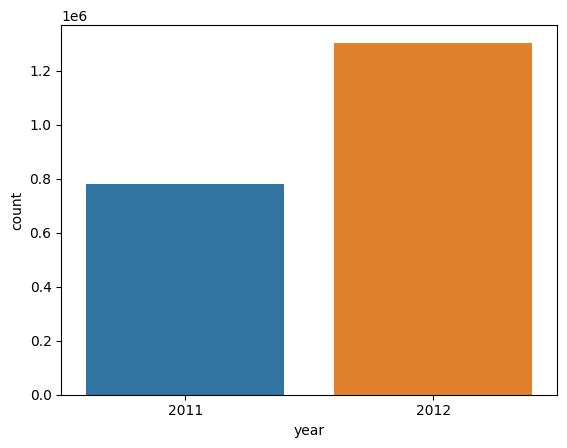

In [ ]:
sns.barplot(data=sum_year,x=sum_year["year"],y=sum_year["count"])

# Insights

*   2012 have more number of rented cycles than 2011

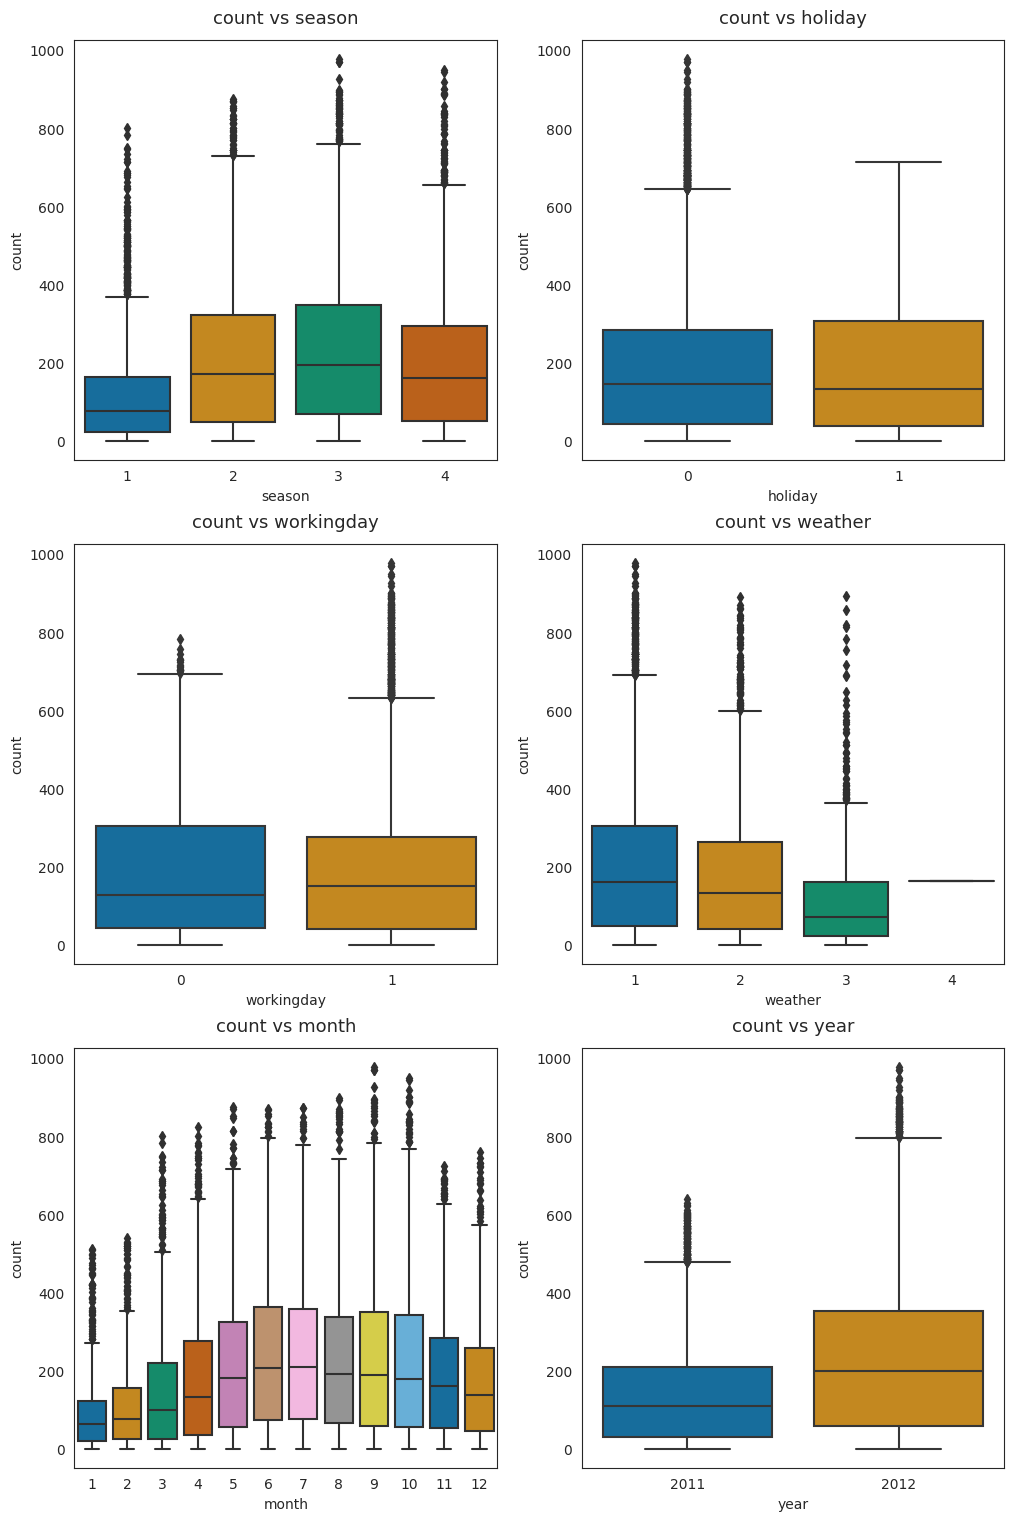

In [ ]:
attrs = ['season', 'holiday', 'workingday', 'weather',"month",'year']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='count', x=attrs[count], ax=axs[row, col], palette='colorblind')
        axs[row,col].set_title(f"count vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


# Insights

*   Season have the lowest median value means in spring season less cycles rented .
*   When there is holiday or non working day slightly more cycles are rented.
*   Whenever there is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow +  
Fog  there were less bikes were rented.
*   Janauary and february has lowest number of cycles rented.
* In 2012 more cycles  rented compared to 2011.

<Axes: >

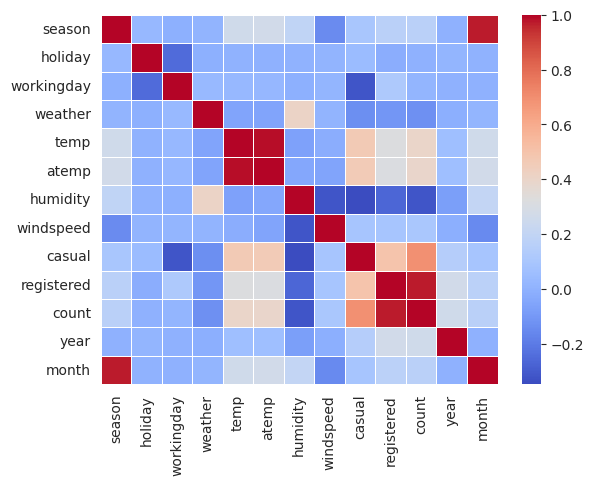

In [ ]:
sns.heatmap(df.corr(numeric_only = True),cmap="coolwarm",linewidths=0.6)

# Insights

* Count is  very highly correalted to casual and registered columns .
* Casual is also  highly correlated to temp  and a temp columns 
* Sesaon is very  highly correlated to months and humidity is also negatively  correlated  to weather.
* count is negatively correlated to humidity and weather

##**Hypothesis Testing**
***H0: Working day has no effect on the number of cycles being rented.***

***Ha: Working day has effect on the number of cycles being rented.***

Significance level (alpha): **0.05** (95%)

We will use the ***2-Sample T-Test*** to test the hypothess defined above

In [ ]:
# defining groups for  2 sample ttest

Workinday_grp= df.loc[df["workingday"]==1]["count"].values
Workinday_grp

array([  5,   2,   1, ..., 168, 129,  88])

In [ ]:
Nonworkinday_grp= df.loc[df["workingday"]==0]["count"].values
Nonworkinday_grp

array([ 16,  40,  32, ..., 106,  89,  33])

In [ ]:
# performing ttest_ind
ttest_ind(Workinday_grp,Nonworkinday_grp,alternative="greater")

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.11322402113180674)

##**Conclusion:**
#### ***Since pvalue is greater than 0.05 so we fail to  reject the Null hypothesis. We will go with our null hypothesis  that says working day has no effect on the number of cycles being rented.***

##**Hypothesis Testing**
***H0: Number of cycles rented is similar in different weather.***

***Ha: Number of cycles rented is not similar in different weather.***

Significance level (alpha): **0.05** (95%)

We will use the ***ANOVA or Kruskal*** to test the hypothess defined above

In [ ]:
# defining groups for  ANOVA or Kruskal

weather1=df.loc[df["weather"]==1]["count"].values
weather1

array([ 16,  40,  32, ..., 168, 129,  88])

In [ ]:
weather2=df.loc[df["weather"]==2]["count"].values
weather2

array([  1,  94, 106, ...,  18,  15,   7])

In [ ]:
weather3=df.loc[df["weather"]==3]["count"].values

In [ ]:
weather4=df.loc[df["weather"]==4]["count"].values
weather4

array([164])

<ipython-input-69-583679e022f4>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(weather4)


<Axes: ylabel='Density'>

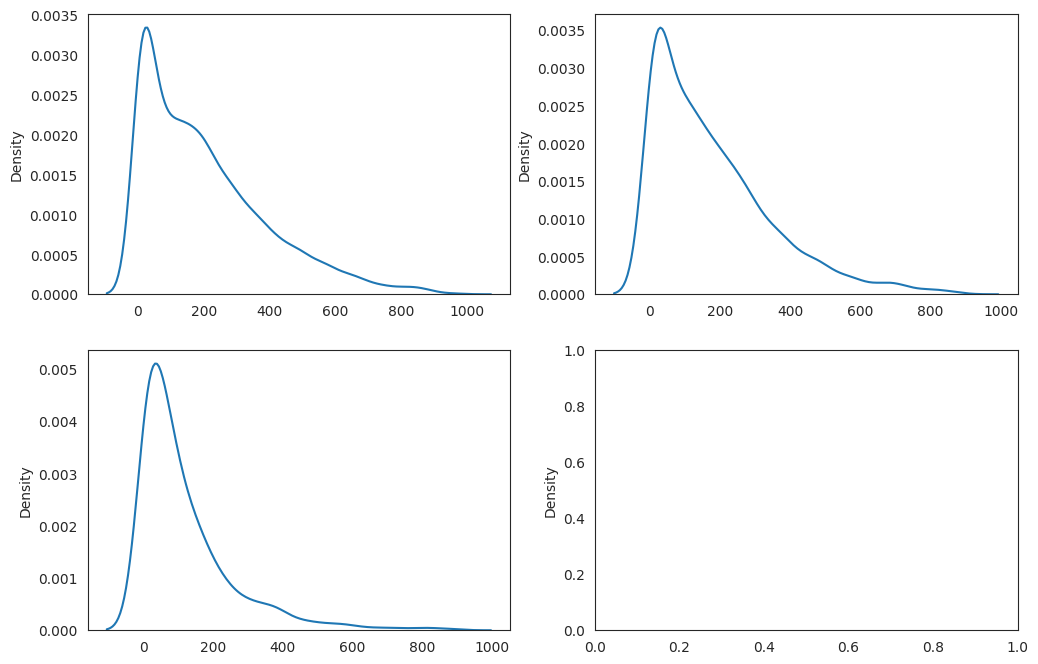

In [ ]:
 # Checking if distribution is normal or not using graph 
fig=plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.kdeplot(weather1)

plt.subplot(2,2,2)
sns.kdeplot(weather2)

plt.subplot(2,2,3)
sns.kdeplot(weather3)

plt.subplot(2,2,4)
sns.kdeplot(weather4)

In [ ]:
# checking if distribution is normal or not by performing Kolmogorov–Smirnov(KS) Test
kstest(weather2,"norm")

KstestResult(statistic=0.9778314710579958, pvalue=0.0, statistic_location=3, statistic_sign=-1)

***By looking at the kdeplot and by performing ks test (pvalue<0.05***) so we have enough evidence to say that data is not normal So we ***Cannot perform ANOVA ***
We'll be performing ***Kruskal test***

In [ ]:
# performing kruskal test
kruskal(weather1,weather2,weather3,weather4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

##**Conclusion:**
#### ***Since pvalue is less(very small) than 0.05 so we can strongly  reject the Null hypothesis. We can say that number of cycles being rented in different weather are not same ***

##**Hypothesis Testing**
***H0: Number of cycles rented is similar in different seasons.***

***Ha: Number of cycles rented is not similar in different seasons.***

Significance level (alpha): **0.05** (95%)

We will use the ***ANOVA or Kruskal*** to test the hypothess defined above

In [ ]:
# defining groups for  ANOVA or Kruskal
season1=df.loc[df["season"]==1]["count"].values
season1

array([ 16,  40,  32, ..., 223, 148,  54])

In [ ]:
season2=df.loc[df["season"]==2]["count"].values
season2

In [ ]:
season3=df.loc[df["season"]==3]["count"].values
season3

array([ 68,  31,  13, ..., 349, 229, 123])

In [ ]:
season4=df.loc[df["season"]==4]["count"].values
season4

array([130,  58,  67, ..., 168, 129,  88])

<Axes: ylabel='Density'>

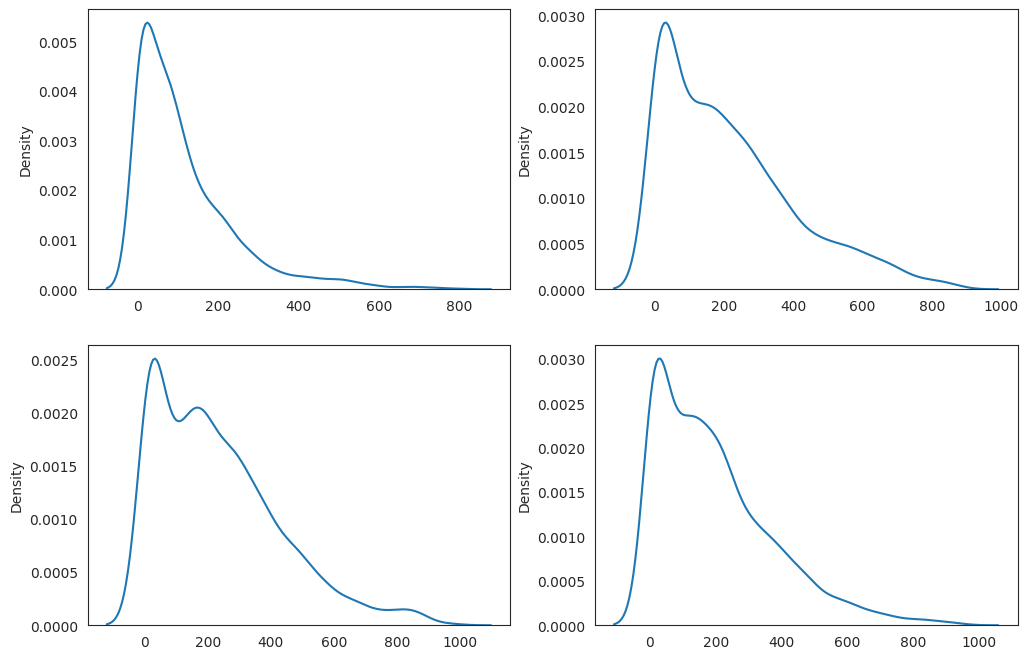

In [ ]:
 # Checking if distribution is normal or not using graph 
fig=plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.kdeplot(season1)

plt.subplot(2,2,2)
sns.kdeplot(season2)

plt.subplot(2,2,3)
sns.kdeplot(season3)

plt.subplot(2,2,4)
sns.kdeplot(season4)

In [ ]:
# checking if distribution is normal or not by performing Kolmogorov–Smirnov(KS) Test
kstest(season1,"norm")

KstestResult(statistic=0.9489550058031239, pvalue=0.0, statistic_location=2, statistic_sign=-1)

***By looking at the kdeplot and by performing ks test (pvalue<0.05***) so we have enough evidence to say that data is not normal So we ***Cannot perform ANOVA ***
We'll be performing ***Kruskal test***

In [ ]:
# performing kruskal test
kruskal(season1,season2,season3,season4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

##**Conclusion:**
#### ***Since pvalue is less(very very small) than 0.05 so we can strongly  reject the Null hypothesis. We can say that  number of cycles being rented in different seasons are not same ***

##**Hypothesis Testing**
***H0: Weather is independent of the season***

***Ha: Weather is dependent of the season***

Significance level (alpha): **0.05** (95%)

We will use the ***chi-square test*** to test the hypothess defined above

In [ ]:
# creating a  two-way contingency table
weather_vs_season = pd.crosstab(df['weather'],df['season'])
weather_vs_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
# perofrming chi square contingency test 
chitest=chi2_contingency(weather_vs_season)
print("pvalue is",chitest[1])

pvalue is 1.5499250736864862e-07


##**Conclusion:**
#### ***Since pvalue is less than 0.05 so we can reject the Null hypothesis. So we can say that weather is dependent on season ***

#Recommendations

*   In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.

*   Working day has no effect on number of bikes rented.
*   In middle of years (June, July, August, September, October) the company should have more bikes in stock to be rented. Because the demand in these months  is higher as compared to other months 


* whenever there is thuunderstorm  or heavy rain company can use that days to service there cycles sisnce these days have very lessnumber of cycles rented .

* they can also use January or February month to service there cycles since it has less rented cycles.

